In [1]:
# 子集搜索
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

# 加载数据集
iris = load_iris()
X, y = iris.data, iris.target
# 创建SelectBest实例
selector = SelectKBest(score_func=chi2, k=2)
# 进行子集搜索
X_new = selector.fit_transform(X, y)
# 获取所选特征的索引
selected_features = selector.get_support(indices=True)
print("Selected features:", selected_features)

Selected features: [2 3]


In [2]:
# 过滤式选择
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

# 加载数据集
iris = load_iris()
X, y = iris.data, iris.target
# 创建SelectBest实例
selector = SelectKBest(score_func=chi2, k=2)
# 进行过滤式选择
X_new = selector.fit_transform(X, y)
# 获取所选特征的索引
selected_features = selector.get_support(indices=True)
print("Selected features:", selected_features)

Selected features: [2 3]


In [3]:
# 包裹式选择

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import numpy as np
# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target
# 创建Logistic回归模型实例
clf = LogisticRegression(solver='liblinear', penalty='l1', C=0.5)
# 创建SelectFromModel实例
selector = SelectFromModel(clf, threshold='mean')
# 进⾏包裹式特征选择
X_new = selector.fit_transform(X, y)
# 获取所选特征的索引
selected_features = selector.get_support(indices=True)
print("Selected features:", selected_features)

Selected features: [1 2]


In [4]:
# 嵌⼊式选择

from sklearn.datasets import load_iris
from sklearn.linear_model import Lasso
import numpy as np
# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target
# 创建Lasso实例
lasso = Lasso(alpha=0.1)
# 进⾏嵌⼊式特征选择
lasso.fit(X, y)
# 获取所选特征的系数
coef = lasso.coef_
print("Feature coefficients:", coef)

Feature coefficients: [ 0.         -0.          0.40811896  0.        ]


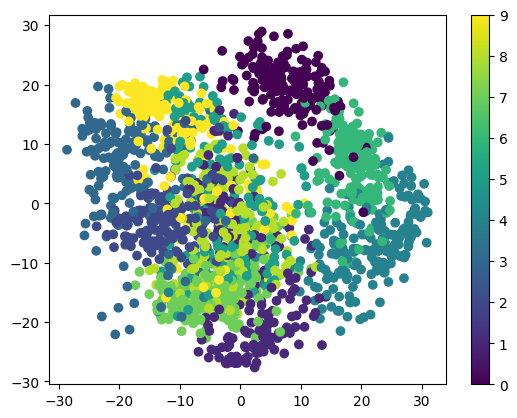

In [ ]:
# 稀疏表⽰

from sklearn.datasets import load_digits
from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt
# 加载数据集
digits = load_digits()
X = digits.data
y = digits.target
# 创建SparsePCA实例
spca = SparsePCA(n_components=2, alpha=1)
# 进⾏稀疏表示
X_spca = spca.fit_transform(X)
# 可视化结果
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=y)
plt.colorbar()
plt.show()

In [12]:
# 压缩感知

from sklearn.datasets import load_digits
from sklearn.decomposition import SparsePCA
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# 加载数据集
digits = load_digits()
X = digits.data
y = digits.target
# 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 创建稀疏表⽰模型
spca = SparsePCA(n_components=2, alpha=1)
X_spca = spca.fit_transform(X_scaled)
# 创建稀疏编码器
lasso = Lasso(alpha=0.1)
lasso.fit(X_spca, y)
coder = lasso.coef_
# 重建数据
X_reconstructed = np.dot(X_spca, spca.components_)
# 计算重构误差
mse = mean_squared_error(X_scaled, X_reconstructed)
print("Mean squared error:", mse)

Mean squared error: 0.748024106731107
